![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – Capacité Numérique CN 3 
</div>

# - Evolution de la température par diffusion thermique -
>Physique Chimie `CPGE PT` lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/python.html </a>
    >> Sujet inspiré par diverses lectures sur le net merci à leurs contributeurs

Dans ce notebook, on cherchera à simuler l’`évolution temporelle du profil de la température le long d'une barre métallique` cylindrique dont la surface latérale est calorifugée. 
>`L'extrémité droite` de la barre est en contact, supposé parfait, avec l'air de température $T_d = 20°C$. Avant le début de l'expérience, toute la barre est à l'équilibre thermique à la température $T_d$. 

A l'instant initial, on place `l'extrémité gauche` de la barre en contact d'une source de chaleur de température $T_g=40°C$. Ce contact est supposé parfait.

![Barre.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/Barre.JPG)


## Etude théorique

On appelle désormais $L=0.5m$ la longueur de la barre.

> **Question 1**
>
> Etablissez l'équation aux dérivées partielles vérifiées par la température dans la barre, aussi appelée "équation de la chaleur à une dimension". Au bout de combien de temps, en ordre de grandeur, peut-on considérer que le régime permanent est atteint au sein de la barre ? Déterminez alors le champ de température $T(x)$ en régime permanent dans la barre et représentez-le.


## Etude numérique

Nous allons dans la suite déterminer la température $T(x,t)$ :
* en tout point de la barre
* à tout instant de l'expérience considérée.

Pour cela, nous allons découper la barre en tronçons de longueur $dx=1cm$.
L'étude sera menée sur une durée de $\Delta t = 45min$, avec un pas temporel de $dt=0.01s$.

La fonction $T(x,t)$ sera donc approximée par un tableau ```T[i,j]``` de telle sorte que :
$T[i,j]\simeq T(x=j\times dx,t=i\times dt)$.

Autrement dit, chaque ligne du tableau correspond à un instant de l'expérience (la ligne ```i=0``` correspondant à l'instant initial). Au sein d'une ligne, on parcourt la barre de gauche (```j=0```) à droite en incrémentant ```j```.

![TableauT_i_j.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/TableauT_i_j.JPG)

Le tableau utilisé est de type ```numpy.array```. On aura de plus besoin du module ```matplotlib.pyplot``` pour effectuer les représentations graphiques du champ de température.

> On importer donc les modules nécessaires à l'étude :

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Initialisation

On nommera désormais les variables entières ```Nt``` et ```Nx``` correspondant respectivement au nombre de lignes du tableau ```T``` et au nombre de colonnes.

>**Question 2**
>
>Définissons ```Nx``` et ```Nt``` sur Python.
>>Créez le tableau ```T``` de bonnes dimensions, rempli pour le moment avec des 0 dans chaque case. 
>>Créez également les listes ```x``` et ```t``` correspondant respectivement aux valeurs de $x$ pour laquelle la température est évaluée, ainsi qu'aux instants $t$ de calcul.

In [2]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

T=### A COMPLETER

x=### A COMPLETER
t=### A COMPLETER

>**Question 3**
>
>Remplir la première ligne du tableau ```T``` pour spécifier les conditions initiales de l'expérience.

In [3]:
Tg=40 #NB : on peut travailler indifférence en °C ou K (on le verra avec le schéma numérique)
Td=20

T[0,0]=Tg
for ### A COMPLETER
    ### A COMPLETER

>**Question 4**
>
>Tracez le profil de la température au sein de la barre à l'instant initial.

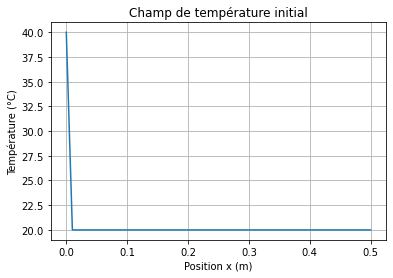

In [4]:
plt.close()
plt.figure()
plt.plot(### A COMPLETER)
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Température (°C)")
plt.title("Champ de température initial")
plt.show()

### Itérations

>**Question 5**
>
> Remplissez le tableau ```T``` de manière à imposer, à tout instant, les conditions aux limites aux deux extrémités de la barre.

In [5]:
for i in range (1,Nt): # l'instant initial a déjà été traité
    ### A COMPLETER
    ### A COMPLETER

Il s'agit donc désormais de résoudre l'équation :
$$\frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}$$

> En utilisant l'approximation de la dérivée, exprimer $\left(\frac{\partial T}{\partial t}\right)_{i,j}$ en fonction de `T[i,j]` et de la température de cases voisines du tableau dont une d'indice i+1, on obtient :

$$\left(\frac{\partial T}{\partial t}\right)_{i,j} \simeq \frac{T[i+1,j]-T[i,j]}{dt}$$

>**Question 6**
>
>  Soit une fonction $f$. En écrivant la formule de Taylor à l’ordre 2 pour $f(x+dx)$ et $f(x-dx)$, démontrer que : 
> $$ f''(x)\simeq\frac{f(x+dx)+f(x-dx)-2f(x)}{dx^2}$$

>**Question 7**
>
> En déduire l'approximation de $\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j}$ en fonction de `T[i,j]` et de la température de cases voisines du tableau.

$$\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j} \simeq \frac{T[i,j+1]+T[i,j-1]-2T[i,j]}{dx^2}$$

> **Question 8**
>
> En déduire que la résolution de l'équation de diffusion thermique dans la barre se ramène au schéma numérique :
> $$ T[i+1,j]=T[i,j]+\frac{D dt}{dx^2} \left( T[i,j+1]+T[i,j-1]-2T[i,j]\right)$$

On peut montrer (...) qu'un tel schéma numérique converge si $\frac{D dt}{dx^2}<\frac{1}{2}$. Avec les valeurs de $dx$ et de $dt$ choisies, cette condition est respectée pour un matériau de coefficient de diffusivité thermique usuelle $D=1.10^{-4} m^2.s^{-1}$. On adoptera donc cette valeur de $D$ pour la suite.

>**Question 9**
>
> Démontrez qu'avec la valeur de D précédente notre simulation, réalisée sur la durée $\Delta t = 45min$, permet d'atteindre le régime permanent. 
>
> Implémentez le schéma numérique précédent pour réaliser le remplissage du tableau ```T``` dans son intégralité.

In [6]:
D=1e-4

for i in range(### A COMPLETER): #on remplit à l'indice i+1
    for j in range(### A COMPLETER): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+D*dt/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])

> A l'aide de la fonction ```plt.imshow```, on visualise le tableau ```T```. On utilise l'argument ```aspect="auto"``` pour obtenir une image lisible.

In [ ]:
plt.close()
plt.figure()
plt.imshow(T,aspect="auto")
plt.show()

Voici ce que vous devriez obtenir :

![TableauT.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/TableauT.png)

>**Question 10**
>Sur la figure pécédente, isolez les profils de température à t=0 et t=25min et représentez-les. Vérifiez que vous retrouvez l'un des profils étudié précédemment.
>
>Pour différents instants bien choisis sur $\Delta t = 45min$, tracez sur un même graphique l'évolution de la température au sein de la barre. Commentez les courbes.

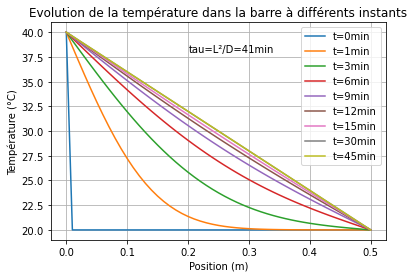

In [8]:
instants_min=[0,### A COMPLETER,45] #instants choisis en minutes

plt.close()
plt.figure()
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    plt.plot(### A COMPLETER,label="t="+str(instants_min[k])+"min")
plt.xlabel("Position (m)")
plt.ylabel("Température (°C)")
plt.title("Evolution de la température dans la barre à différents instants")
plt.legend()
plt.grid()

tau_min=L*L/D*1/60

plt.text(0.201,38,"tau=L²/D="+str(tau_min)[0:2]+"min")

plt.show()